In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

In [2]:
df = pd.read_csv('data/sample_data.csv')

<Axes: xlabel='space', ylabel='rent'>

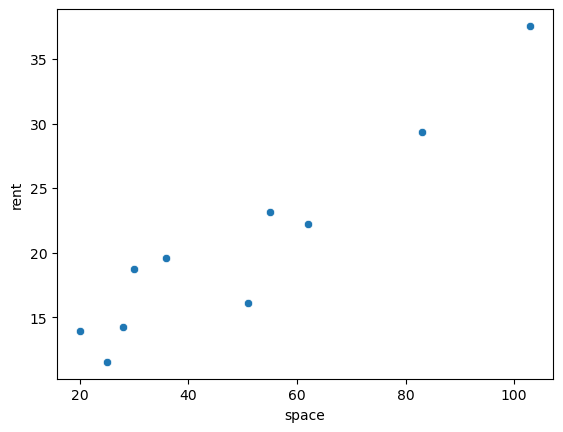

In [3]:
X = df['space']
y = df['rent']
sns.scatterplot(data=df, x=X, y=y)

## 損失関数を実装

In [4]:
X = df['space'].values
y = df['rent'].values
theta_0 = 5,
theta_1 = 7

def cost_func(theta_0, theta_1, x, y):
  return np.mean((y - (theta_0 + theta_1 * x)) ** 2)

cost_func(theta_0, theta_1, x=X, y=y)

138703.20244638805

## 損失関数可視化

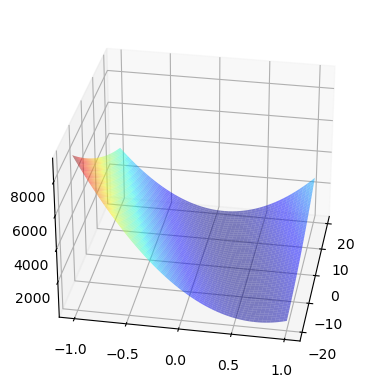

In [5]:
n = 300
theta_0_list = np.linspace(-20, 20, n)
theta_1_list = np.linspace(-1, 1, n)
cost_func_nums = []

for params in list(product(theta_0_list, theta_1_list)):
  cost = cost_func(*params, x=X, y=y)
  cost_func_nums.append(cost)
Z =  np.array(cost_func_nums).reshape(n, n)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0_list, theta_1_list)

ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

# 最急降下法

In [6]:
n = 100000
a = 0.00005
theta_0 = -5
theta_1 = -0.5
results = {}
theta_0_hist = []
theta_1_hist = []

def least_descent_m_theta_0(theta_0, theta_1, x, y):
  return np.mean(((theta_0 + theta_1 * x) - y)) * 2

def least_descent_m_theta_1(theta_0, theta_1, x, y):
  return np.mean((((theta_0 + theta_1 * x) - y)) * x) * 2

for i in range(n):
  least_theta_0 = least_descent_m_theta_0(theta_0=theta_0, theta_1=theta_1, x=X, y=y)
  least_theta_1 = least_descent_m_theta_1(theta_0=theta_0, theta_1=theta_1, x=X, y=y)
  theta_0 = theta_0 - a * least_theta_0
  theta_1 = theta_1 - a * least_theta_1
  theta_0_hist.append(theta_0)
  theta_1_hist.append(theta_1)

## 最急降下法の結果を描画

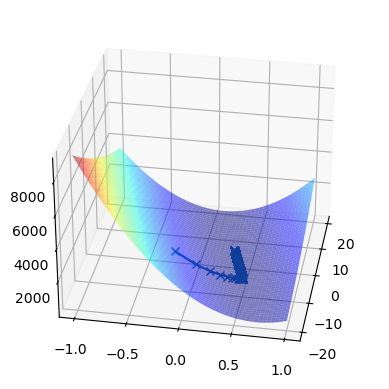

In [7]:
cost_hist = [cost_func(*params, X, y) for params in list(zip(theta_0_hist, theta_1_hist))]

ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

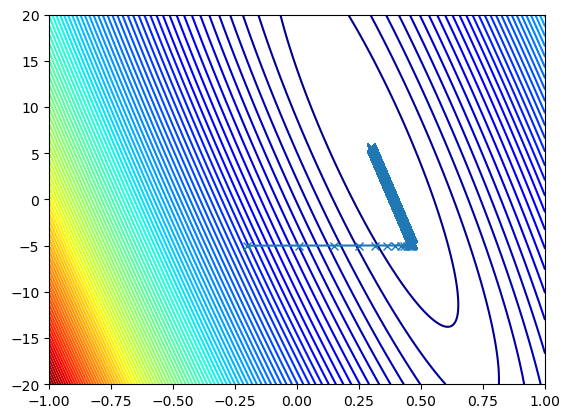

In [8]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')

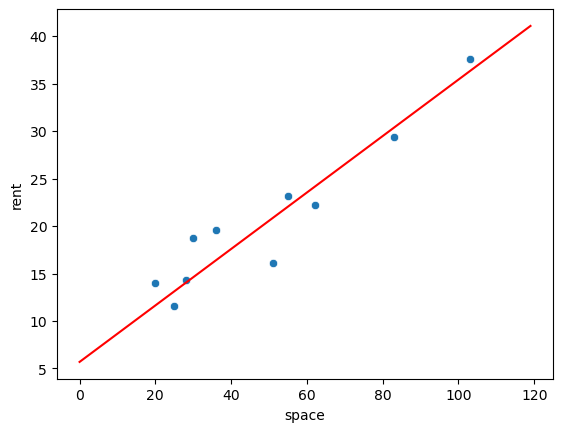

In [9]:
sns.scatterplot(data=df, x='space', y='rent')
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1] * x_values
plt.plot(x_values, y_values, '-', color='r')

In [10]:
space = 70
rent = theta_0_hist[-1] + theta_1_hist[-1] * space
rent

26.497676123575744